In [1]:
from moldy.validation.prediction.prediction_validation import PredictionValidation
from moldy.case_studies.grub_hw.learnedModel_grub_hw import LearnedModel_GrubHW

# data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw/data/good_data/max_normalization/raw_data/validation_inputdata.npy"
data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw/data/good_data/test_data/smooth/validation_inputdata.npy"
# data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw/notebooks/data.npy"

ground_truth = LearnedModel_GrubHW("/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw/results/best_models/SOURCE")

pred_tester = PredictionValidation(LearnedModel_GrubHW, 63000, ground_truth, data_path=data_path, states_of_interest=[6, 7], data_start_location=5000)
pred_tester.run_trials(
                # "/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw/results/other_logs/",
                    "/home/daniel/Documents/data/xfer_learning/hw_to_sideways_weight_grub_data/best_models/",

    # "/home/daniel/catkin_ws/src/moldy/case_studies/grub_sim/results/run_logs/",
                                  "/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw/results/test_results/",
                                  "PAPER_DATA_BEST_MODELS")

GrubSim: mass: 5.0, stiffness: 14.07, damping: 2.73, alpha: 2.856, h: 0.23, r: 0.095
GrubSim: mass: 5.0, stiffness: 14.07, damping: 2.73, alpha: 2.856, h: 0.23, r: 0.095


In [1]:
################# BASE DATA HW TO BASE MODEL ###############################

from moldy.validation.prediction.prediction_validation import PredictionValidation
from moldy.case_studies.grub_hw.learnedModel_grub_hw import LearnedModel_GrubHW

# data_path = "/home/daniel/Documents/data/xfer_learning/grub_data_collection/base_grub_data_MAIN/base_grub_test/smooth_all_inputs.npy"
# data_path = "/home/daniel/Documents/data/xfer_learning/grub_data_collection/base_grub_data_MAIN/parsed_csvs/base_grub_data/smooth_all_inputs.npy"
data_path = "/home/daniel/Documents/data/xfer_learning/sim_to_hw_grub_data/data/test_data/smooth/validation_inputdata.npy"

ground_truth = LearnedModel_GrubHW("/home/daniel/Documents/data/xfer_learning/hw_to_elastic_grub_data/best_models/SOURCE")

pred_tester = PredictionValidation(LearnedModel_GrubHW, 3000, ground_truth, data_path=data_path, states_of_interest=[6, 7], data_start_location=5000)
pred_tester.run_trials(
                # "/home/daniel/Documents/data/xfer_learning/sim_to_hw_grub_data/best_models",
                "/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw/results/run_logs/",

                "/home/daniel/catkin_ws/src/moldy/case_studies/grub_hw/results/test_results/",
                "test")

GrubSim: mass: 5.0, stiffness: 14.07, damping: 2.73, alpha: 2.856, h: 0.23, r: 0.095
GrubSim: mass: 5.0, stiffness: 14.07, damping: 2.73, alpha: 2.856, h: 0.23, r: 0.095


In [39]:
pred_tester.results["ground_truth"] = ground_truth_data


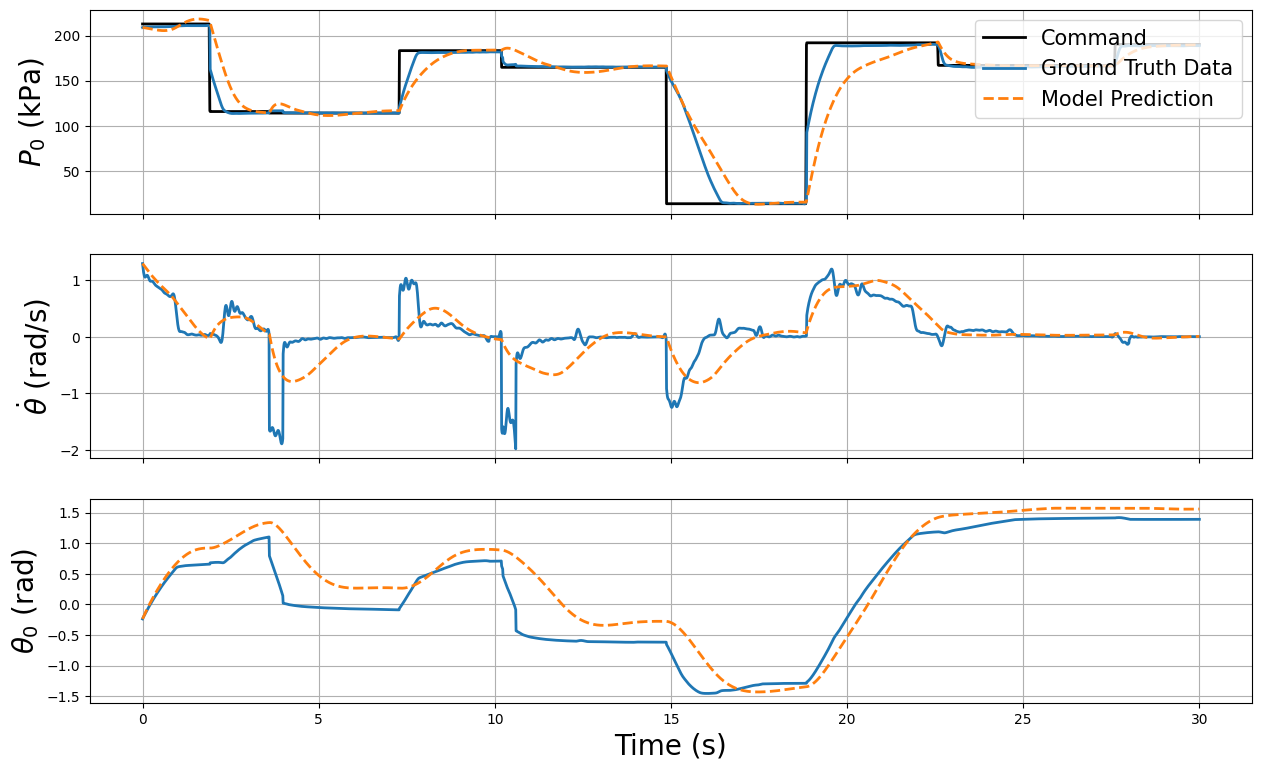

In [3]:
import matplotlib.pyplot as plt
import numpy as np

state_labels = ["$P_0$ (kPa)", "$P_1$ (kPa)", "$P_2$ (kPa)", "$P_3$ (kPa)", "$\\dot{\\theta}$ (rad/s)", "$\\dot{\\phi}$ (rad/s)", \
                "$\\theta_0$ (rad)", "$\\phi_0$ (rad)"]
# states_of_interest = [0, 1, 2, 3, 4, 5, 6, 7]
states_of_interest =[0, 4, 6]
ground_truth_data = pred_tester.results["ground_truth"]
pred_tester.results.pop("ground_truth")

plt.rc('pdf',fonttype = 42)

fig, axs = plt.subplots(len(states_of_interest), 1, figsize=(15, len(states_of_interest)*3), sharex=True)

plt.rc('axes', labelsize=20)

timestep = np.linspace(0, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"].shape[0]//100, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"].shape[0])

for j in range(len(states_of_interest)):
    i = states_of_interest[j]
    if i < 4:
        axs[i].plot(timestep, ground_truth_data[:, i+8], "-k", label="Command", linewidth=2.0)
    axs[j].plot(timestep, ground_truth_data[:, i], c="C0", label="Ground Truth Data", linewidth=2.0)

    for key in sorted(pred_tester.results.keys()):
        # axs[j].plot(timestep, pred_tester.results[key]["learned_predictions"][:, i], "--", label=key.split("/")[-1], linewidth=2.0, c="tab:orange")
        axs[j].plot(timestep, pred_tester.results[key]["learned_predictions"][:, i], "--", label="Model Prediction", linewidth=2.0, c="tab:orange")

    axs[j].grid()
    axs[j].set_ylabel(state_labels[i])

axs[-1].set_xlabel("Time (s)")
axs[0].legend(loc='upper right', fontsize=15)

# fig.legend(*axs[0].get_legend_handles_labels(),
#             loc='upper center', ncol=6, fontsize=15)

pred_tester.results["ground_truth"] = ground_truth_data

plt.savefig("/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/grub_prediction_hw_base_model.pdf", bbox_inches="tight")
